# Assignment 8

### 1.复习课上内容， 阅读相应论文。

### 2. 回答以下理论题目

#### 1.  What is autoencoder?

autoencoder是一种无监督的学习算法，主要用于数据的降维或者特征的抽取、机器翻译等，在深度学习中，autoencoder可用于在训练阶段开始前，确定权重矩阵WW的初始值。

神经网络中的权重矩阵WW可看作是对输入的数据进行特征转换，即先将数据编码为另一种形式，然后在此基础上进行一系列学习。我们希望利用初始化生成的权重矩阵进行编码时，我们希望编码后的数据能够较好的保留原始数据的主要特征。如果编码后的数据能够较为容易地通过解码恢复成原始数据，我们则认为权重矩阵WW编码较好的保留了数据信息。

对数据进行编码和解码时，使用的是同一个参数矩阵WW

#### 2. What are the differences between greedy search and beam search?

根据自然语言句子生成的特性，模型依次输出最大概率的词汇，我们需要在这基础上求得最大概率的句子。介绍greedy search(贪心搜索)和beam search(集束搜索)。

贪心搜索最为简单，直接依次选择每次输出概率最大的词汇，直到出现终结符或最大句子长度，然后将这些词汇组合为句子。

集束搜索使用beam size参数来限制在每一步保留下来的可能性词的数量。集束搜索是在测试阶段为了获得更好准确性而采取的一种策略，在训练阶段无需使用。

假设字典为[a,b,c]，beam size选择2，则如下有：

1：在生成第1个词的时候，选择概率最大的2个词，那么当前序列就是a或b

2：生成第2个词的时候，我们将当前序列a或b，分别与字典中的所有词进行组合，得到新的6个序列aa ab ac ba bb bc,然后从其中选择2个概率最高的，作为当前序列，即ab或bb

3：不断重复这个过程，直到遇到结束符为止。最终输出2个概率最高的序列。

疑问：得到ab和bb后，是将ab、bb分别与字典中所有词组合，再选择最优2个，如abb、abc。还是将ab中的b、bb中的b与字典中所有词组合起来，再选择最优2个？
目前个人认为是前者。

#### 3. What is the intuition of attention mechanism?

Global attention

In [2]:
from IPython.display import Image

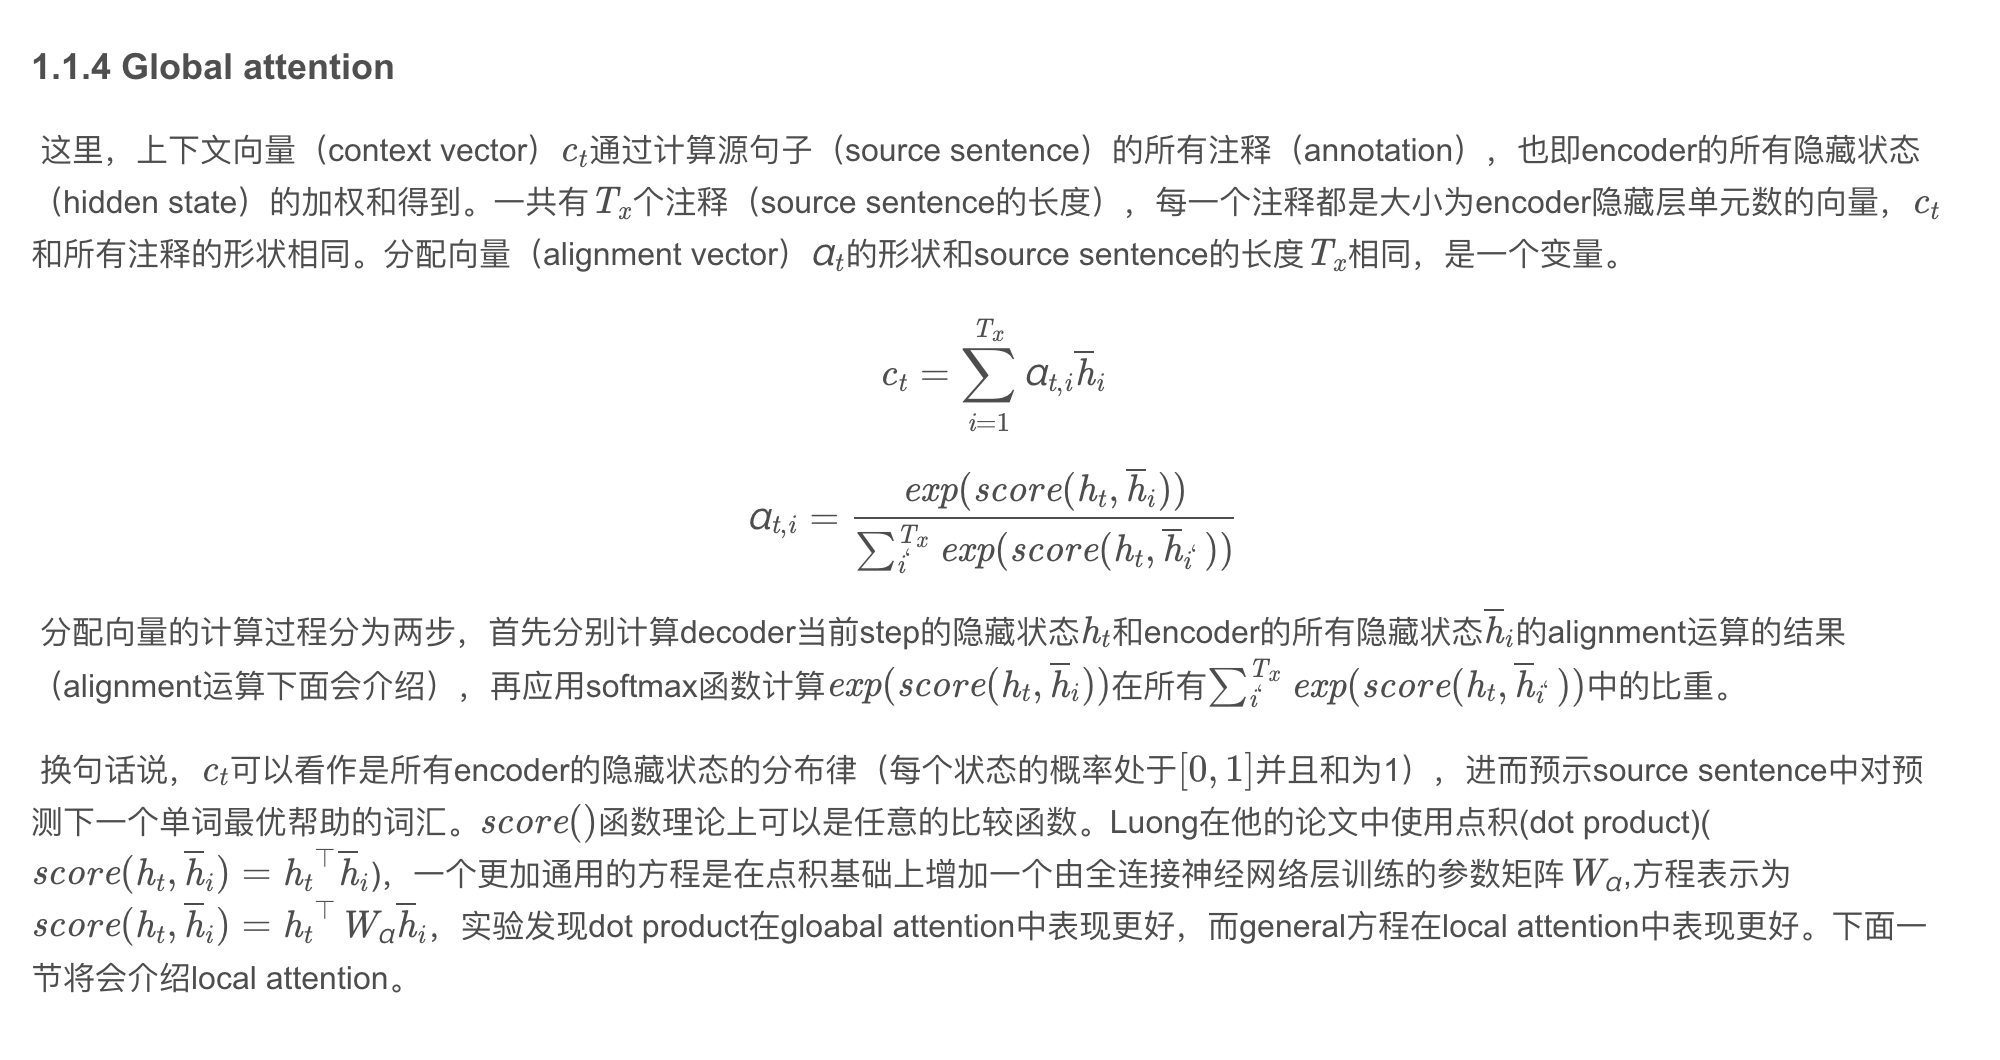

In [5]:
PATH = "/Users/junjiexie/Desktop/"
Image(filename = PATH + "globalAttention.png")

#### 4. What is the disadvantage of word embeding introduced in previous lectures ?

1.由于词和向量是一对一的关系，所以多义词的问题无法解决。

2.Word2vec 是一种静态的方式，虽然通用性强，但是无法针对特定任务做动态优化。

#### 5. What is the architecture of ELMo model. (A brief description is enough)

ELMo作者认为好的词表征模型应该同时兼顾两个问题：一是词语用法在语义和语法上的复杂特点；二是随着语言环境的改变，这些用法也应该随之改变。作者提出了deep contextualized word representation 方法来解决以上两个问题。

这种算法的特点是：每一个词语的表征都是整个输入语句的函数。具体做法就是先在大语料上以language model为目标训练出bidirectional LSTM模型，然后利用LSTM产生词语的表征。ELMo故而得名(Embeddings from Language Models)。为了应用在下游的NLP任务中，一般先利用下游任务的语料库(注意这里忽略掉label)进行language model的微调,这种微调相当于一种特定领域的切换; 然后才利用label的信息进行supervised learning。

ELMo表征是“深”的，就是说它们是biLSTM的所有层的内部表征的函数。这样做的好处是能够产生丰富的词语表征。高层的LSTM的状态可以捕捉词语意义中和语境相关的那方面的特征(比如可以用来做语义的消歧)，而低层的LSTM可以找到语法方面的特征(比如可以做词性标注)。如果把它们结合在一起，在下游的NLP任务中会体现优势。

#### 6. Compared to RNN,  what is the advantage of Transformer ?

1.突破了 RNN 模型不能并行计算的限制。

2.相比 CNN，计算两个位置之间的关联所需的操作次数不随距离增长。

3.自注意力可以产生更具可解释性的模型。我们可以从模型中检查注意力分布。各个注意头(attention head)可以学会执行不同的任务。

对第2点的补充注释：

网络中远程依赖关系之间的路径长度。在许多NLP任务中，学习远程依赖性是一项关键挑战。影响学习这种依赖性的能力的一个关键因素是网络中前向和后向信号必须经过的路径长度。输入和输出序列中位置的任意组合之间的这些路径越短，则越容易学习远程依赖性。在CNN类的模型中，通过卷积计算两个位置之间的关联所需的操作次数是随距离增长的。而 Self-attention 计算两个位置之间的关联所需的操作次数是与距离无关的。

#### 7. Why we use layer normalizaiton instead of batch normalization in Transformer ?

将输入的图像shape记为[N, C, H, W]，即[样本数N, 通道数C, 高度H, 宽度W]

batchNorm是在batch上，对NHW做归一化；layerNorm在通道方向上，对CHW归一化，主要对RNN作用明显

batch normalization存在以下缺点：

1.对batchsize的大小比较敏感，由于每次计算均值和方差是在一个batch上，所以如果batchsize太小，则计算的均值、方差不足以代表整个数据分布；

2.BN实际使用时需要计算并且保存某一层神经网络batch的均值和方差等统计信息，对于对一个固定深度的前向神经网络（DNN，CNN）使用BN，很方便；但对于NLP任务来说，sequence的长度是不一致的，可能存在一个特殊sequence比其他sequence长很多，这样training时，计算很麻烦。

主要是第2个缺点，使得我们在NLP任务中使用layerNorm。LN中同层神经元输入拥有相同的均值和方差，不同的输入样本有不同的均值和方差。所以，LN不依赖于batch的大小和输入sequence的长度，这也是在Transformer中应用LN而非BN的原因。

#### 8. Why we need position embedding in Transformer ?

In [15]:
from IPython.display import Latex

In [14]:
Latex(r"""\begin{equation}\left\{\begin{aligned}&PE_{2i}(p)=\sin\Big(p/10000^{2i/{d_{pos}}}\Big)\\ 
&PE_{2i+1}(p)=\cos\Big(p/10000^{2i/{d_{pos}}}\Big) 
\end{aligned}\right.\end{equation}""")

<IPython.core.display.Latex object>

带attention层的模型并不能捕捉序列的顺序。

如果将注意力中的K,V按行打乱顺序（相当于句子中的词序打乱），那么Attention的结果还是一样的。对于时间序列来说，尤其是对于NLP中的任务来说，顺序是很重要的信息，它代表着局部甚至是全局的结构，学习不到顺序信息，那么效果将会大打折扣。

于是Google论文作者引入了——Position Embedding，也就是“位置向量”，将每个位置编号，然后每个编号对应一个向量，通过结合位置向量和词向量，就给每个词都引入了一定的位置信息，这样Attention就可以分辨出不同位置的词了。

作者添加位置编码的方法是：构造一个跟输入embedding维度一样的矩阵，然后跟输入embedding相加得到multi-head attention 的输入。

其中，PE为二维矩阵，大小跟输入embedding的维度一样；p表示词语在句子中的位置；dpos表示词向量的维度；2i表示词向量的位置。(解释这里可能是有问题的）

#### 9. Briefly describe what is self-attention and what is multi-head attention?

##### transformer中的self-attention

In [16]:
Latex(r"\begin{equation}Attention(\boldsymbol{Q},\boldsymbol{K},\boldsymbol{V}) = softmax\left(\frac{\boldsymbol{Q}\boldsymbol{K}^{\top}}{\sqrt{d_k}}\right)\boldsymbol{V}\end{equation}")

<IPython.core.display.Latex object>

In [17]:
Latex(r"\begin{equation}Attention(\boldsymbol{q}_t,\boldsymbol{K},\boldsymbol{V}) = \sum_{s=1}^m \frac{1}{Z}\exp\left(\frac{\langle\boldsymbol{q}_t, \boldsymbol{k}_s\rangle}{\sqrt{d_k}}\right)\boldsymbol{v}_s\end{equation}")

<IPython.core.display.Latex object>

其中Z是归一化因子。事实上q,k,v分别是query,key,value的简写，K,V是一一对应的，它们就像是key-value的关系，那么上式的意思就是通过qt这个query，通过与各个ks内积的并softmax的方式，来得到qt与各个vs的相似度，然后加权求和，得到一个dv维的向量。其中因子dk起到调节作用，使得内积不至于太大（太大的话softmax后就非0即1了，不够“soft”了）。

对q,k,v的注释：第一步，根据编码器的输入向量，生成三个向量，比如，对每个词向量，生成query-vec, key-vec, value-vec，生成方法为输入向量分别乘以三个矩阵，这些矩阵在训练过程中需要学习。不是每个词向量独享3个matrix，而是所有输入共享3个matrix

##### muti-head attention

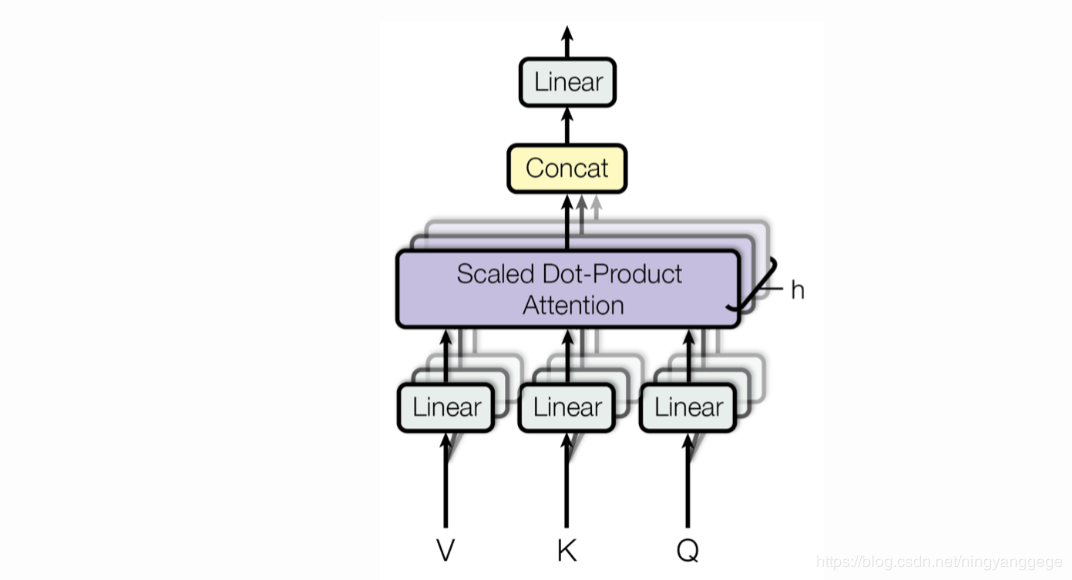

In [18]:
PATH = "/Users/junjiexie/Desktop/"
Image(filename = PATH + "mutiAttention.png")

In [19]:
Latex(r"\begin{equation}head_i = Attention(\boldsymbol{Q}\boldsymbol{W}_i^Q,\boldsymbol{K}\boldsymbol{W}_i^K,\boldsymbol{V}\boldsymbol{W}_i^V)\end{equation}")

<IPython.core.display.Latex object>

In [20]:
Latex(r"\begin{equation}MultiHead(\boldsymbol{Q},\boldsymbol{K},\boldsymbol{V}) = Concat(head_1,...,head_h)\end{equation}")

<IPython.core.display.Latex object>

将Q,K,V通过参数矩阵映射一下，然后再导入Attention，把这个过程重复做h次，把结果拼接起来,就得到了muti-Attention

#### 10. What is the basic unit of GPT model?

可能对这个问题不是很理解：

GPT使用了transformer中的decoder结构,并做了些调整（去掉了中间的Encoder-Decoder Attention层），并将decoder架构堆叠了十二层，每一个decoder层就是GPT模型中的基本单元。

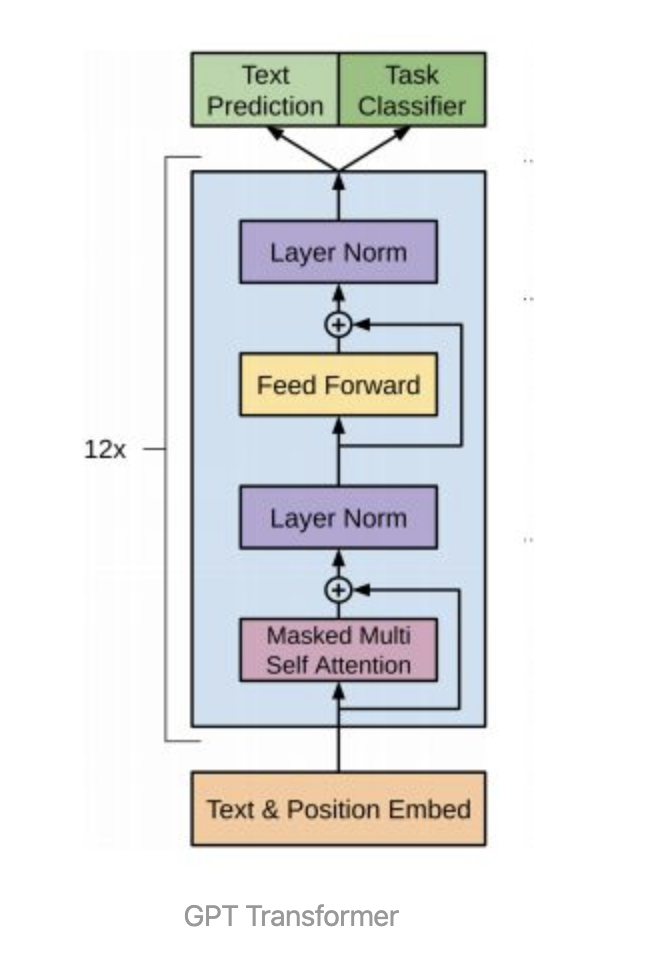

In [23]:
PATH = "/Users/junjiexie/Desktop/"
Image(filename = PATH + "GPTdecoder层.png")

gpt模型将decoder架构堆叠了12层，每一层就是它的基本单元

#### 11. Briefly descibe how to use GPT in other NLP tasks?

GPT 经过预训练之后，会针对具体的下游任务对模型进行微调。微调的过程采用的是有监督学习，训练样本包括单词序列 [x1, x2, ..., xm] 和 类标 y。GPT 微调的过程中根据单词序列 [x1, x2, ..., xm] 预测类标 y。

In [26]:
Latex(r"\begin{equation}P(y|x^{1},...,x^{m}) = softmax(h_{m}^{l}W_{y})\end{equation}")

<IPython.core.display.Latex object>

In [29]:
Latex(r"\begin{equation}h_{l} = transformer\_block(h_{l-1}),l\epsilon [1,n]\end{equation}")

<IPython.core.display.Latex object>

#### 12. What is masked language model in BERT ?

BERT利用Transformer构造了一个双向的预训练模型。为了防止出现“信息泄露”，BERT训练一个带mask的语言模型，也就是随机在句子中给token加上mask，然后目标是预测mask处的token，论文中作者给15%的token加入mask。但是这样做会有两个缺点，一是这些token在预训练中永远无法出现，在fine-tune的时候会不一致。另一个缺点是模型收敛的比较慢，这在实验部分有体现，因为毕竟只有15%的token在每个batch中被预测。针对第一个缺点，作者设计了如下替换方法.

1.80%的概率给这15%的token加入mask

2.10%的概率将这些token随机替换成另外的token

3.10%的概率不进行改变，保持原有的token

#### 13. What are the inputs of BERT ?

BERT模型的输入分别是token embedding和句子信息embedding以及位置embedding合并起来（图解是加和）

#### 14. Briely descibe how to use BERT in other NLP tasks.

BERT模型在NLP下游任务中主要应用Fine-tuning模式。

Fine-tuning方式是指在已经训练好的语言模型的基础上，加入少量的task-specific parameters, 例如对于分类问题在语言模型基础上加一层softmax网络，然后在新的语料上重新训练来进行fine-tune。

例如针对sequence-level classification problem(例、如情感分析)，取第一个token的输出表示，输入到softmax层得到分类结果输出；对于token-level classification(例如NER)，取所有token的输出，输入到softmax层得到分类输出。

#### 15. What are the differences between these three models: GPT, BERT, GPT2.

GPT：
使用transformer解码器架构构建，堆叠了12层。该模型是自回归模型，即模型生成一个新单词后，该单词就被添加在之前生成的单词序列后面，这个序列会成为模型下一步的新输入。self-Attention层是部分掩盖的，不允许模型得到即将预测单词的信息。

BERT：
使用transformer编码器架构构建，该模型是自动编码模型。BERT训练一个带mask的语言模型，也就是随机在句子中给token加上mask，然后目标是预测mask处的token。

GPT2：
使用transformer解码器架构构建，堆叠层数相较于GPT层数更深（48层），同属自回归模型，但是参数更多，预训练的文本数据更大。同时，去掉了fine-tuning层，不再针对不同任务分别进行微调建模。